### Logistic Regression Script

#### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import metrics
from warnings import filterwarnings
filterwarnings('ignore')


#### Plot Styling

In [2]:
# SOURCE: This plot styling is adapted from Peyton Lewis' and Aidan Cremins' Advanced Corporate Finance course's 
# Credit Ratings Analysis assigment for Professor Michael Sury.

plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['lines.linewidth'] = 0.6
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

#### Reading in Test/Train Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Baseline Accuracies

In [4]:
train_baseline_accuracy = train['readmitted'].value_counts().max() / len(train['readmitted'])
test_baseline_accuracy = test['readmitted'].value_counts().max() / len(test['readmitted'])
print()
print('Train Baseline Accuracy:', format(train_baseline_accuracy, '.5%'))
print('Test Baseline Accuracy:', format(test_baseline_accuracy, '.5%'))


Train Baseline Accuracy: 61.17312%
Test Baseline Accuracy: 61.81473%


#### Establishing Train/Test Data

In [5]:
X_train = train.drop(columns= ['readmitted'])
y_train = train['readmitted']
X_test = test.drop(columns= ['readmitted'])
y_test = test['readmitted']

In [6]:
# SOURCE: This confusion matrix code is adapted from Peyton Lewis' and Aidan Cremins' Advanced Corporate Finance course's 
# Credit Ratings Analysis assigment for Professor Michael Sury.

def create_confusion_matrix(test_vals, pred_vals, model_name):

    conf_mat = confusion_matrix(test_vals, pred_vals)

    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    
    #Change the 0's and 1's to the actual class names for clearer interpretation
    plt.xticks(ticks=[0.5,1.5], labels=['Not Readmitted','Readmitted'])
    plt.yticks(ticks=[0.5,1.5], labels=['Not Readmitted','Readmitted'])
    plt.title('Confusion Matrix for {} Model'.format(model_name))
    

In [7]:
# SOURCE: This ROC curve code is adapted from Peyton Lewis' and Aidan Cremins' Advanced Corporate Finance course's 
# Credit Ratings Analysis assigment for Professor Michael Sury.

def create_roc_curve(model, x_test, y_test, model_name):
    metrics.plot_roc_curve(model, x_test, y_test, name=model_name)
    plt.plot([0,1],[0,1], linestyle='--', label='Baseline Classifier',color = 'red')
    plt.grid()
    plt.legend()

In [8]:
# SOURCE: This PR curve code is adapted from Peyton Lewis' and Aidan Cremins' Advanced Corporate Finance course's 
# Credit Ratings Analysis assigment for Professor Michael Sury.

def create_pr_curve(model, x_test, y_test, model_name):
    metrics.plot_precision_recall_curve(model, x_test, y_test, name=model_name)
    positive_rate = sum(y_test)/len(y_test)
    plt.plot([0,1],[positive_rate,positive_rate], linestyle='--', label='Baseline Classifier',color = 'red')
    plt.grid()
    plt.legend()

#### Model 1 : Symmetric Costs

Accuracy Score: 0.7436140579624252
              precision    recall  f1-score   support

           0       0.74      0.90      0.81     10430
           1       0.76      0.48      0.59      6443

    accuracy                           0.74     16873
   macro avg       0.75      0.69      0.70     16873
weighted avg       0.75      0.74      0.73     16873



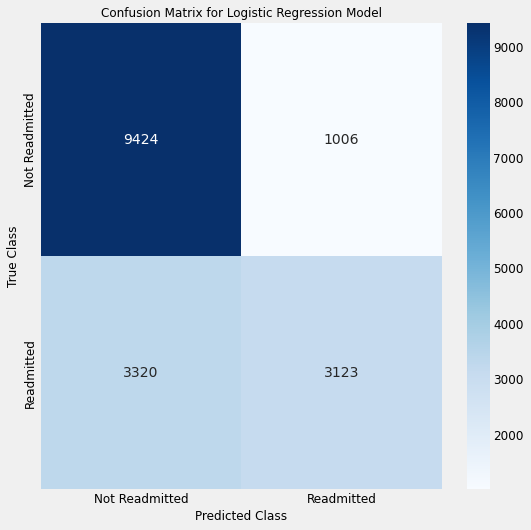

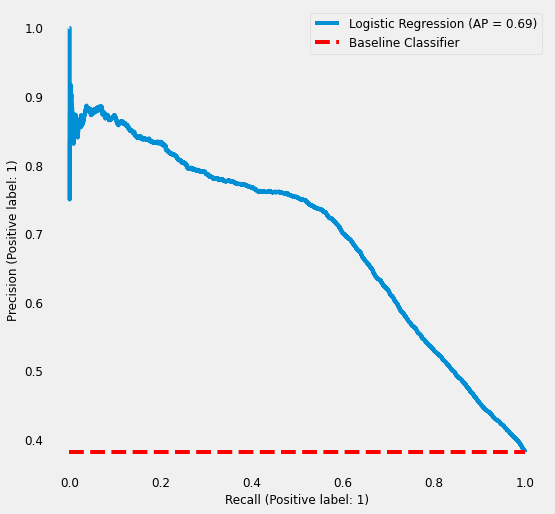

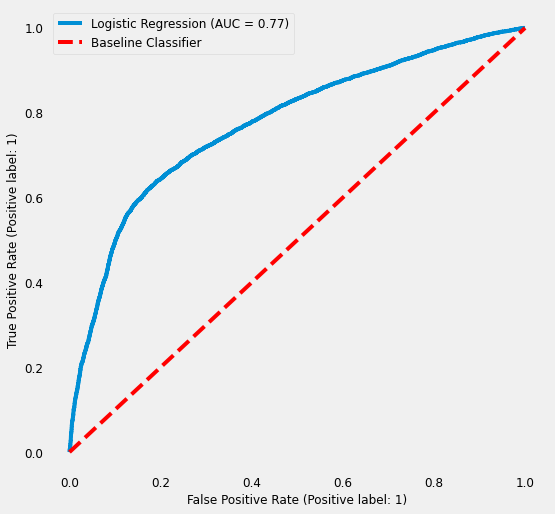

In [9]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
create_confusion_matrix(y_test, y_pred, 'Logistic Regression')
create_pr_curve(logistic, X_test, y_test, 'Logistic Regression')
create_roc_curve(logistic, X_test, y_test, 'Logistic Regression')

#### Model 2 : Asymmetric Costs

Accuracy Score: 0.7253007763883127
              precision    recall  f1-score   support

           0       0.80      0.74      0.77     10430
           1       0.62      0.70      0.66      6443

    accuracy                           0.73     16873
   macro avg       0.71      0.72      0.72     16873
weighted avg       0.73      0.73      0.73     16873



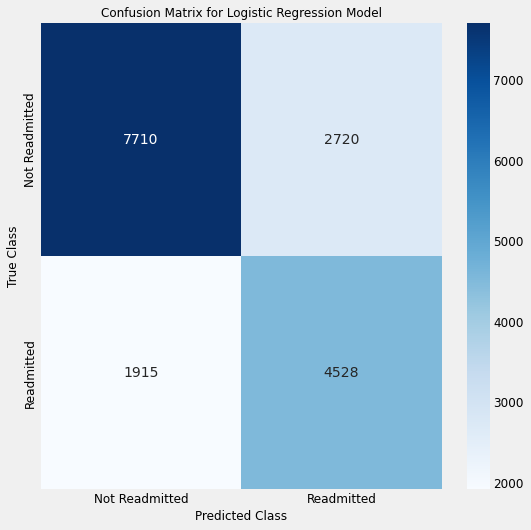

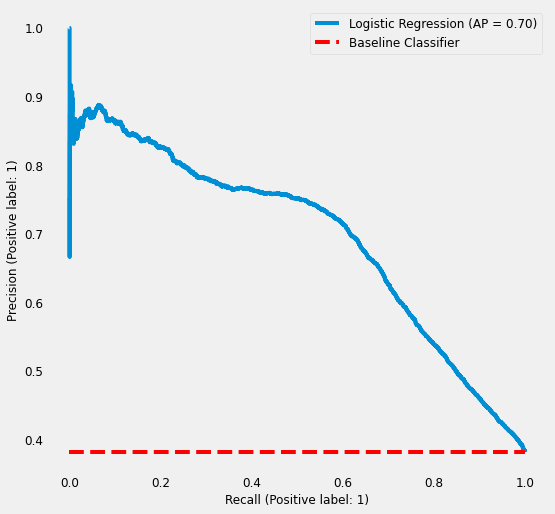

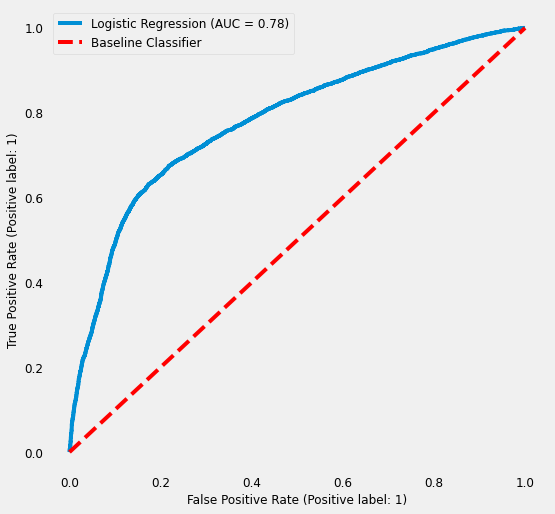

In [10]:
logistic = LogisticRegression(class_weight = {0 : 1, 1 : 2})
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
create_confusion_matrix(y_test, y_pred, 'Logistic Regression')
create_pr_curve(logistic, X_test, y_test, 'Logistic Regression')
create_roc_curve(logistic, X_test, y_test, 'Logistic Regression')